In [24]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
sns.set(style="white")
matplotlib.rc('figure', figsize=[12, 5])

In [25]:
Ins_df = pd.read_csv("finalapi.csv")
Ins_df.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,...,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,...,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,...,0,0,0,103,50,288,0,0,0,0


In [26]:
print(Ins_df.shape)

(213328, 49)


In [27]:
Ins_df.dtypes

AGENCY_ID                      int64
PRIMARY_AGENCY_ID              int64
PROD_ABBR                     object
PROD_LINE                     object
STATE_ABBR                    object
STAT_PROFILE_DATE_YEAR         int64
RETENTION_POLY_QTY             int64
POLY_INFORCE_QTY               int64
PREV_POLY_INFORCE_QTY          int64
NB_WRTN_PREM_AMT             float64
WRTN_PREM_AMT                float64
PREV_WRTN_PREM_AMT           float64
PRD_ERND_PREM_AMT            float64
PRD_INCRD_LOSSES_AMT         float64
MONTHS                         int64
RETENTION_RATIO              float64
LOSS_RATIO                   float64
LOSS_RATIO_3YR               float64
GROWTH_RATE_3YR              float64
AGENCY_APPOINTMENT_YEAR        int64
ACTIVE_PRODUCERS               int64
MAX_AGE                        int64
MIN_AGE                        int64
VENDOR_IND                    object
VENDOR                        object
PL_START_YEAR                  int64
PL_END_YEAR                    int64
C

In [28]:
Ins_df.columns

Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED',
       'PL_QUO_CT_APPLIED', 'PL_BOU

In [29]:
Ins_df1=Ins_df.loc[:, 'AGENCY_ID':'POLY_INFORCE_QTY']
Ins_df2=Ins_df.loc[:, 'PREV_POLY_INFORCE_QTY':'MONTHS']
Ins_df3=Ins_df.loc[:, 'RETENTION_RATIO':'AGENCY_APPOINTMENT_YEAR']
Ins_df4=Ins_df.loc[:, 'ACTIVE_PRODUCERS':'CL_END_YEAR']
Ins_df5=Ins_df.loc[:, 'ACTIVITY_NOTES_START_YEAR':'PL_BOUND_CT_ELINKS']
Ins_df6=Ins_df.loc[:, 'PL_QUO_CT_ELINKS':'PL_BOUND_CT_APPLIED']
Ins_df7=Ins_df.loc[:, 'PL_QUO_CT_APPLIED':'PL_QUO_CT_TRANSACTNOW']

In [30]:
# First step is to  see which may be the redundant or unnecessary cols

del_col_list = ['VENDOR', ]

Ins_df = Ins_df.drop(del_col_list, axis=1)
Ins_df.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,...,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,...,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,...,0,0,0,103,50,288,0,0,0,0


In [31]:
#  dropping the duplicates from the dataset.
print(Ins_df.shape)
Ins_df = Ins_df.drop_duplicates(keep='first')
print(Ins_df.shape)

(213328, 48)
(213328, 48)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f8f58d0>,
      dtype=object)

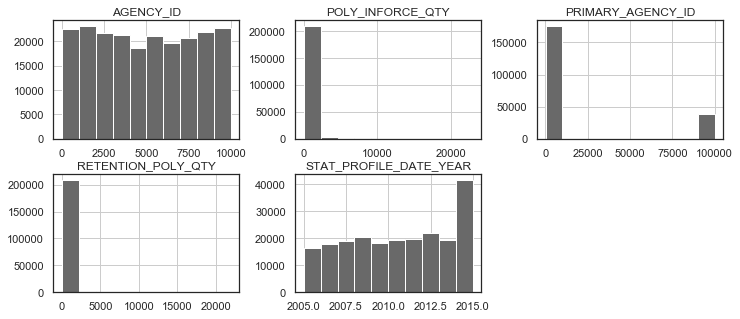

In [32]:
Ins_df1.hist(color='dimgray', layout=(2, 3)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f8f5fd0>,
      dtype=object)

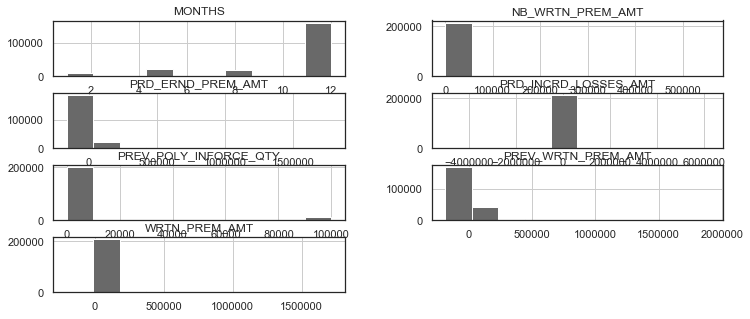

In [33]:
Ins_df2.hist(color='dimgray', layout=(4, 2)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f394f28>,
      dtype=object)

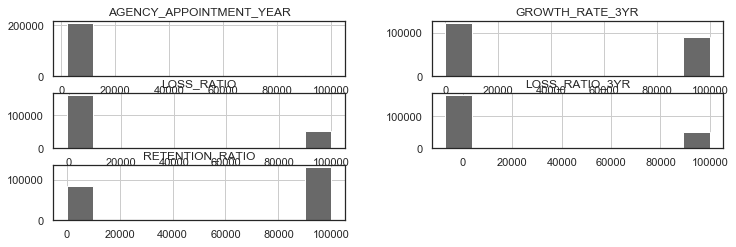

In [34]:
Ins_df3.hist(color='dimgray', layout=(4, 2)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224b75c0>,
      dtype=object)

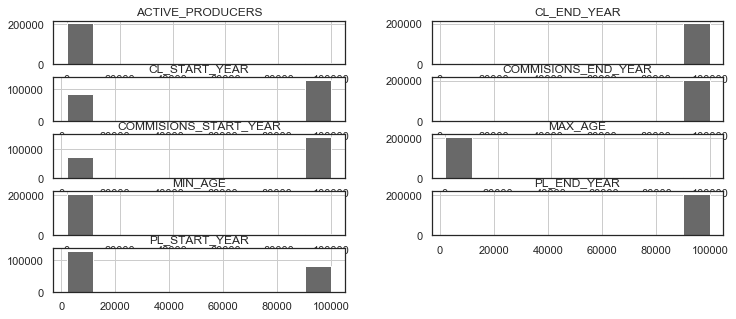

In [36]:
Ins_df4.hist(color='dimgray', layout=(5, 2)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f680d30>,
      dtype=object)

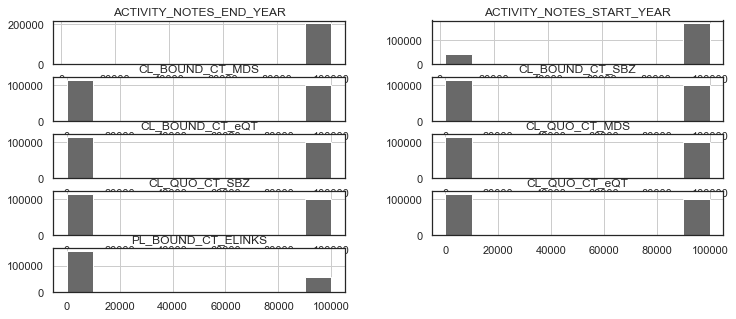

In [38]:
Ins_df5.hist(color='dimgray', layout=(5, 2)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1245d1be0>,
      dtype=object)

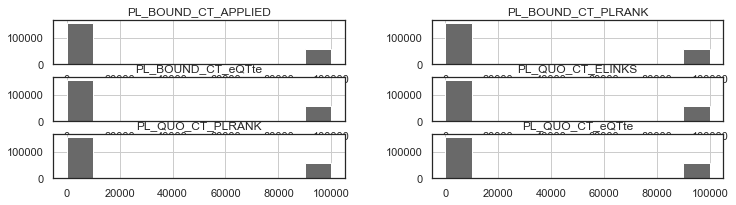

In [39]:
Ins_df6.hist(color='dimgray', layout=(5, 2)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1245d13c8>,
      dtype=object)

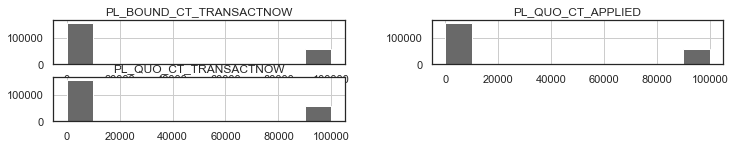

In [40]:
Ins_df7.hist(color='dimgray', layout=(5, 2)) 

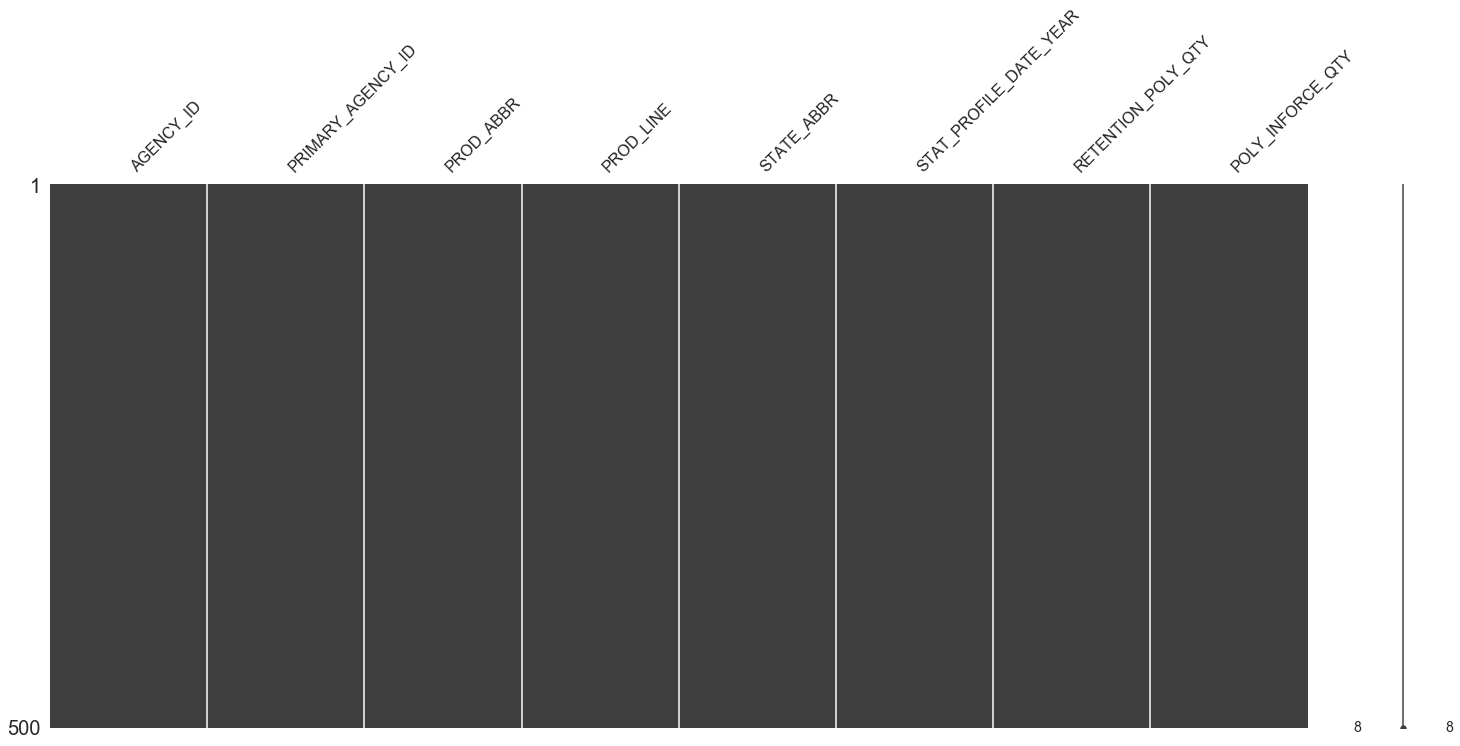

In [41]:
msno.matrix(Ins_df1.sample(500));

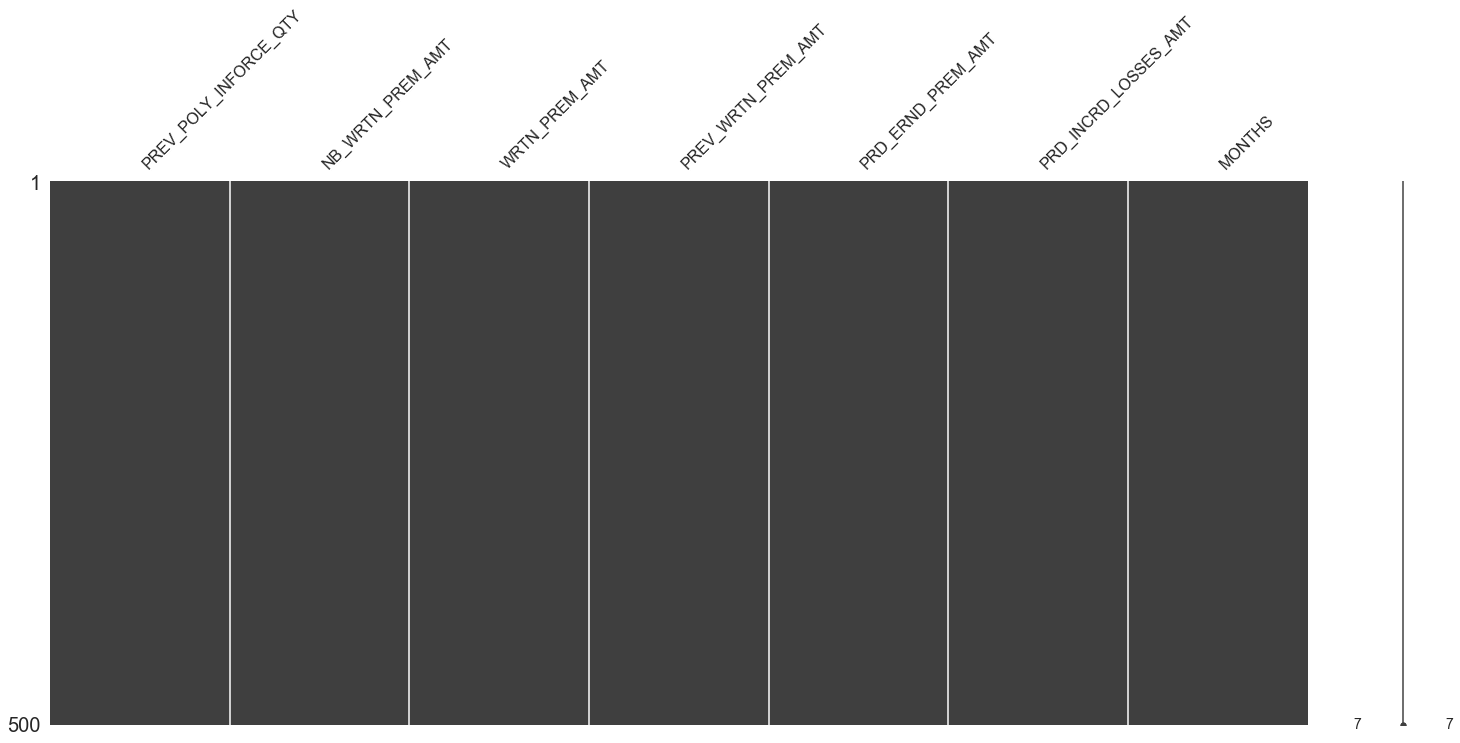

In [42]:
msno.matrix(Ins_df2.sample(500));

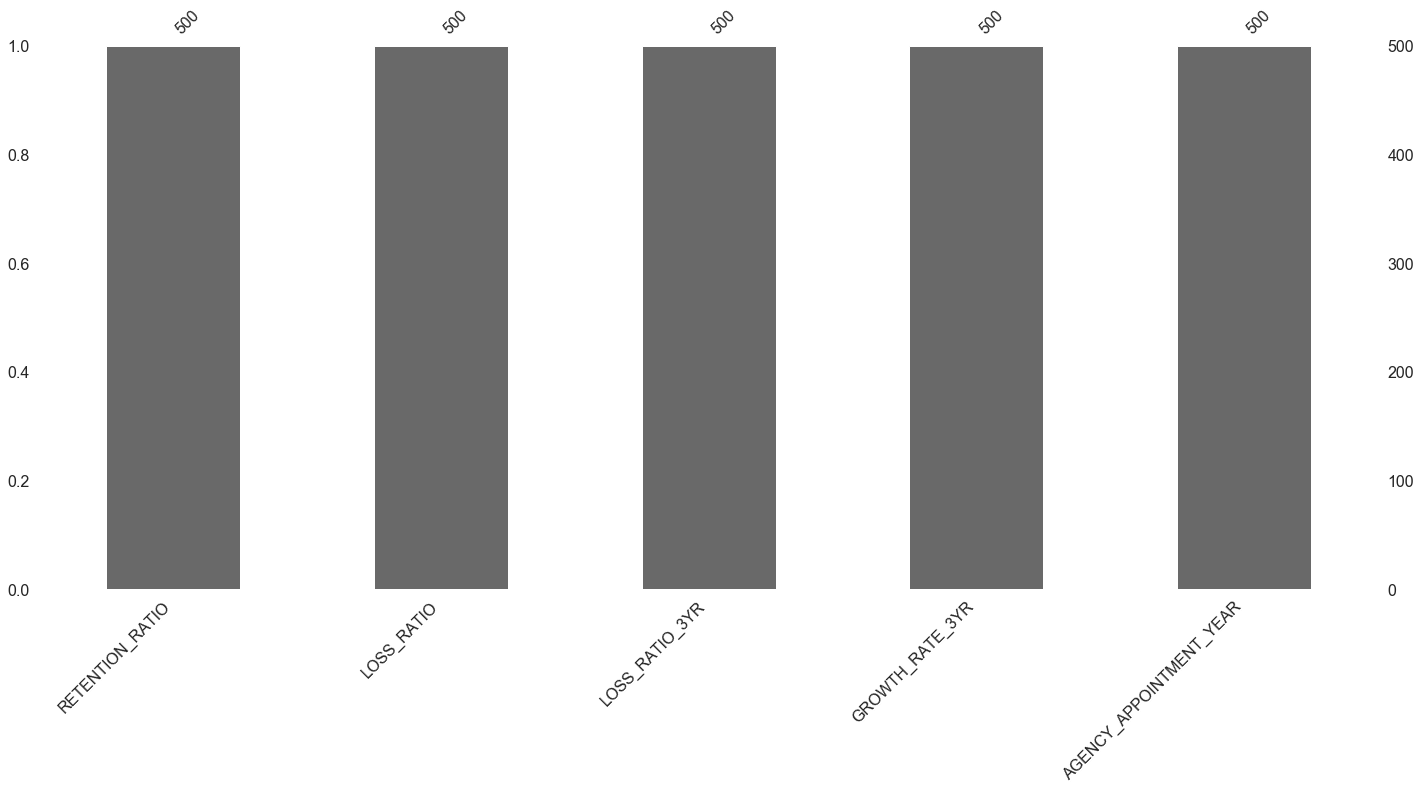

In [43]:
msno.bar(Ins_df3.sample(500));

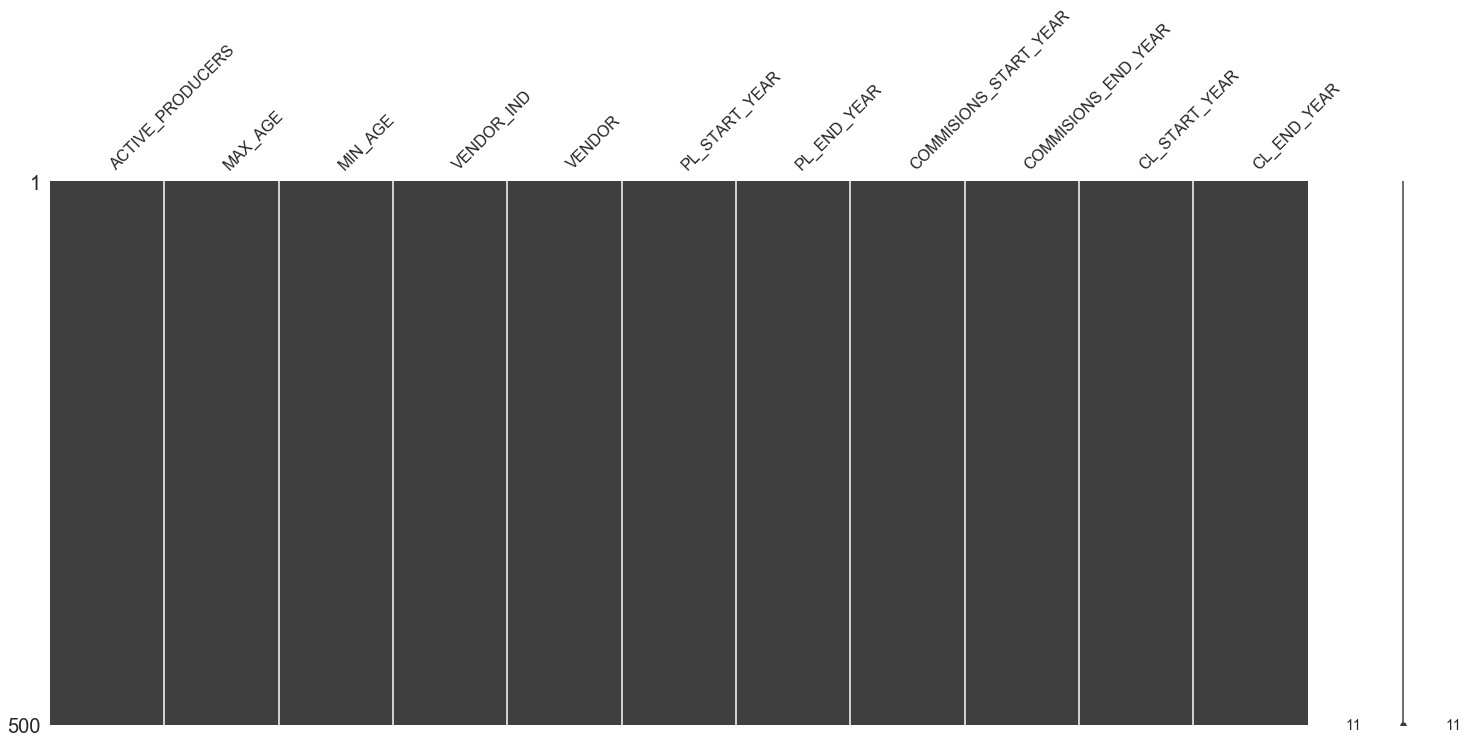

In [44]:
msno.matrix(Ins_df4.sample(500));

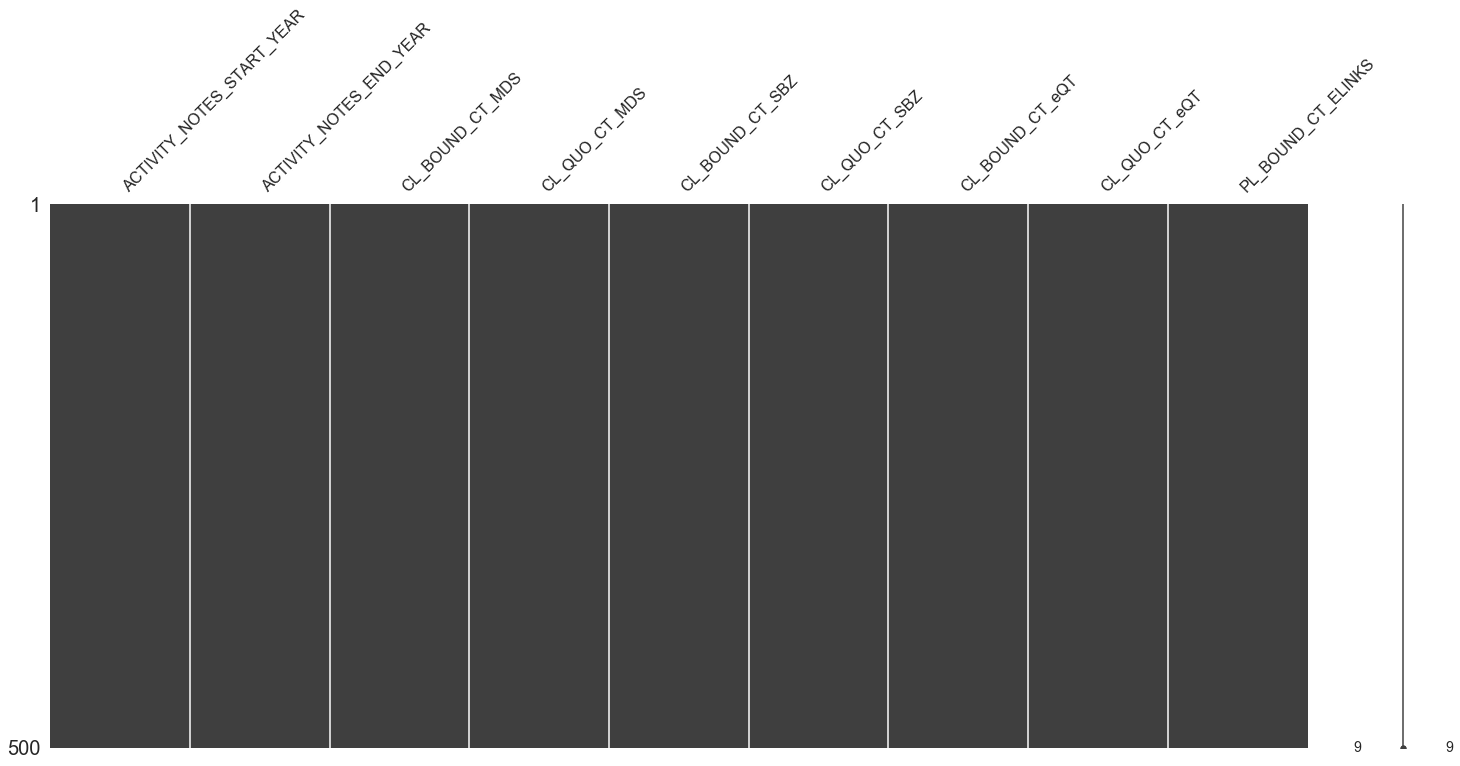

In [45]:
msno.matrix(Ins_df5.sample(500));

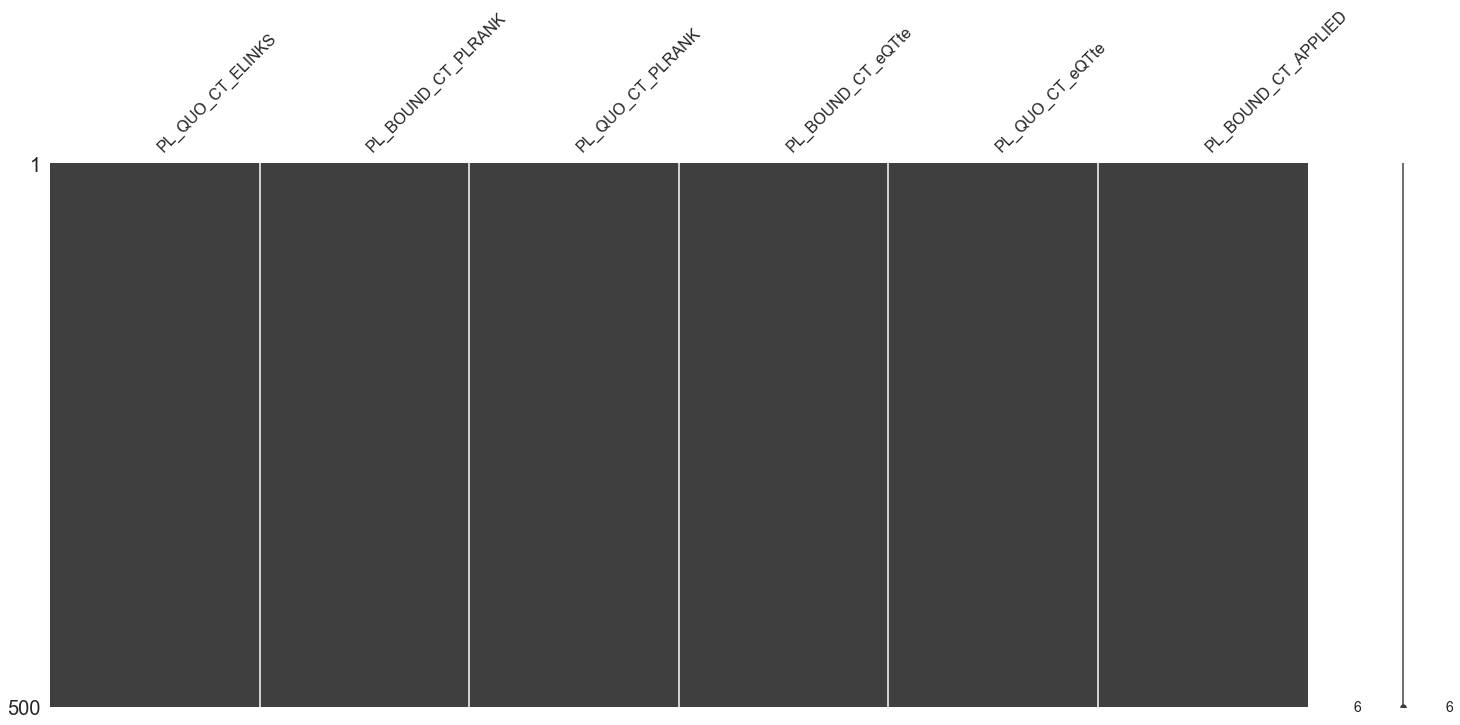

In [46]:
msno.matrix(Ins_df6.sample(500));

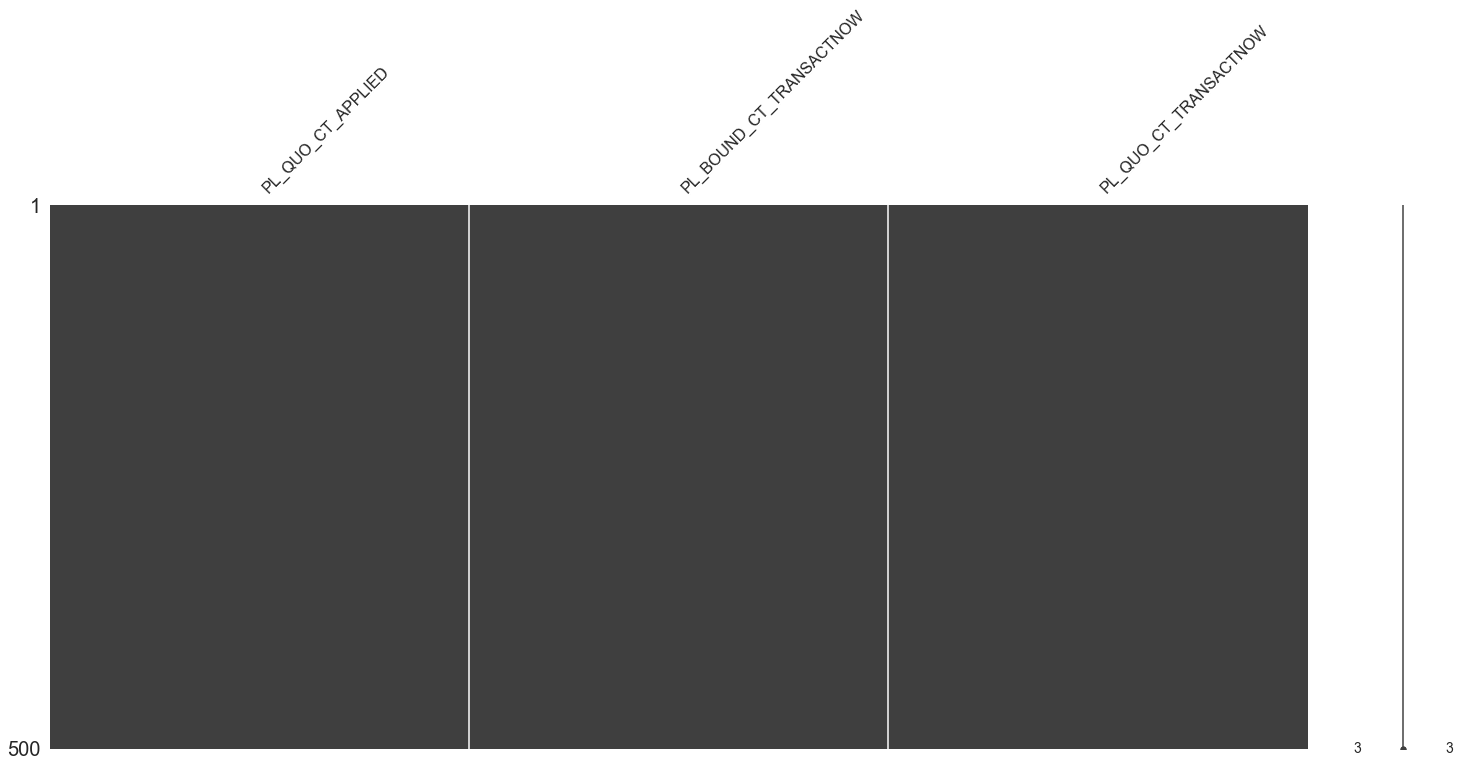

In [47]:
msno.matrix(Ins_df7.sample(500));

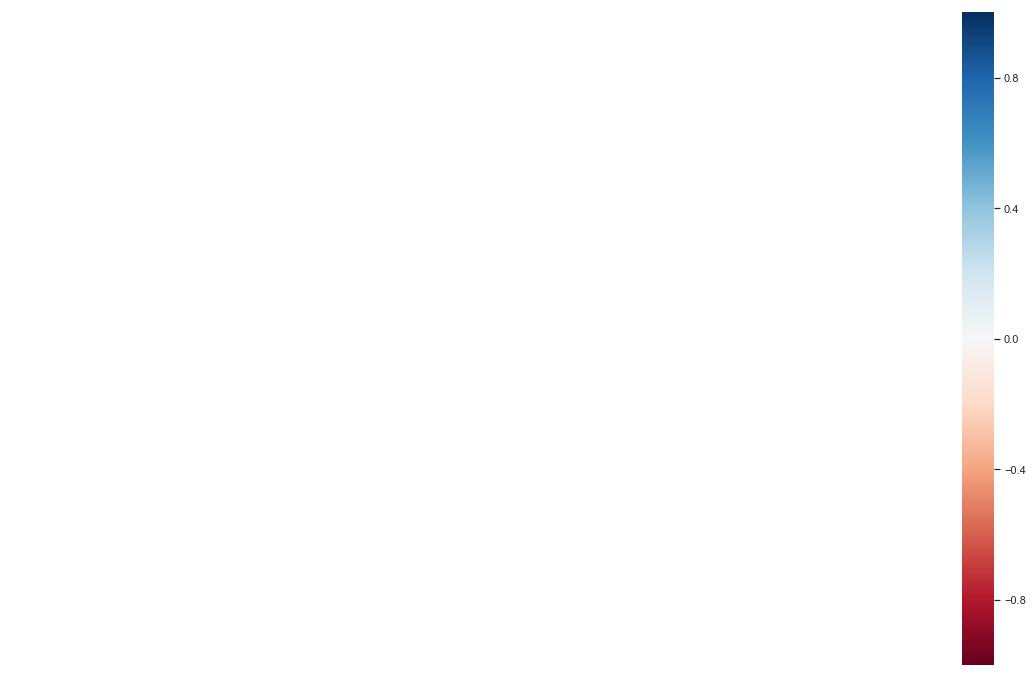

In [48]:
msno.heatmap(Ins_df1);

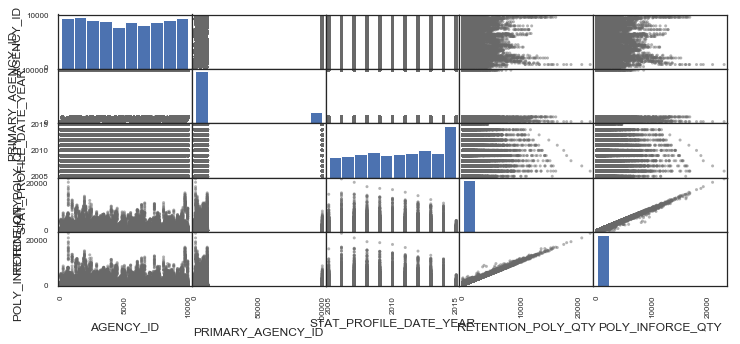

In [49]:
pd.plotting.scatter_matrix(Ins_df1, color='dimgray');

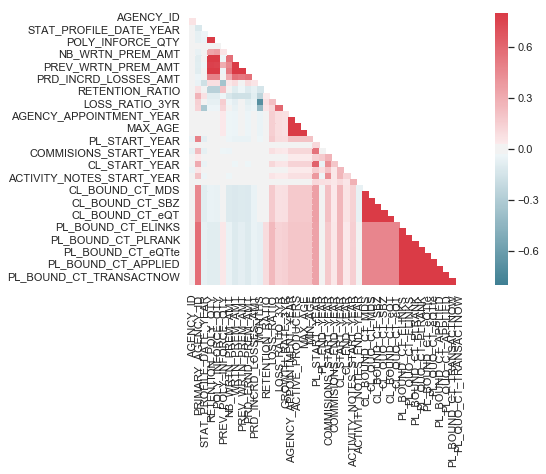

In [50]:
# Compute the correlation matrix
corr = Ins_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, square=True);

---